## Creating Trading Signals
#### Momentum and Short Term Indicators

In [10]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
import datetime
import matplotlib.pyplot as plt
# Yahoo Finance Dataset
today = datetime.datetime.now().strftime("%Y-%m-%d")
spx = yf.download('^GSPC', start='2014-01-01', end=today)
close_prices = spx['Close']

[*********************100%***********************]  1 of 1 completed


Moving Average Indicator: We can use Python to get short and long term average prices over time (50 days and 1 year). We can then generate a buy signal when the short-term moving average crosses above the long-term moving average and a sell signal when it crosses below.

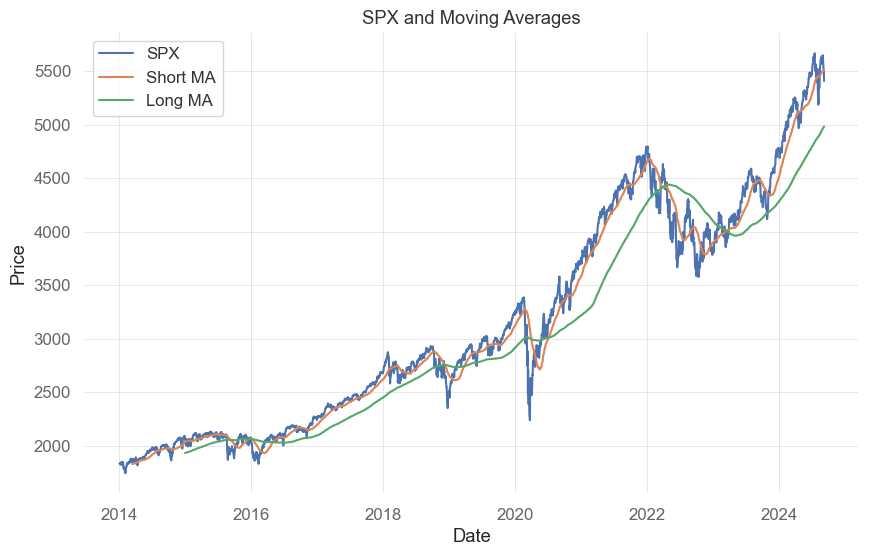

In [11]:
# Calculating Moving Averages (Indicators)
short_window = 50
long_window = 252
short_ma = close_prices.rolling(window=short_window, min_periods=short_window).mean()
long_ma = close_prices.rolling(window=long_window, min_periods=long_window).mean()
#Plotting the Moving Averages
plt.figure(figsize=(10, 6))
plt.plot(spx.index, spx['Close'], label='SPX')
plt.plot(short_ma.index, short_ma, label='Short MA')
plt.plot(long_ma.index, long_ma, label='Long MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPX and Moving Averages')
plt.legend()
plt.show()

#### From Indicators to signals
Unlike indicators, which primarily describe current or past market conditions, signals provide actionable insights for future trades. Signals range from -1 to 1, representing the confidence level of a prediction. Negative values are bearish, Positive are bullish, values around 0 are neutral. The closer a signal is to the extremities (-1 or 1), the higher the confidence in the forecast. While signals guide the direction of the trade (long or short), they don't dictate the position size or the risk management strategy. The strength of the signal should be used in conjunction with other factors, such as portfolio balance, risk tolerance, and market conditions, to make informed trading decisions.

In machine learning models, employing the hyperbolic tangent (TanH) function is a common practice to normalize output signals to the range of [-1, 1]. This normalization helps in standardizing the prediction output, making it interpretable in the context of trading signals.

Additionally, this technique isn't confined to machine learning. It can be equally effective in conventional trading algorithms for transforming raw prediction values into standardized trading signals.

Let's begin with the simplest buy or sell signal, -1 or 1.

In [13]:
# Generating Trading Signals
signals = pd.DataFrame(index=close_prices.index)
signals['signal'] = 0.0  # Set the default to be 0
signals['short_ma'] = short_ma
signals['long_ma'] = long_ma
# When the short is above the long, buy - else go short sell.
# Note that our signal is just a simple buy or sell, -1 or 1.
signals.loc[signals['short_ma'] > signals['long_ma'], 'signal'] = 1
signals.loc[signals['short_ma'] < signals['long_ma'], 'signal'] = -1